In [1]:
from pybedtools import BedTool
import pandas as pd

In [2]:
genes_bed = BedTool("../download/genome/knownGene_hg19.bed")

In [3]:
genes_bed.count()

82960

In [9]:
genes_df.head()

,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount,blockSizes,blockStarts
0,chr1,11873,14409,uc001aaa.3,0,+,11873,11873,0,3,"354,109,1189,","0,739,1347,"
1,chr1,11873,14409,uc010nxr.1,0,+,11873,11873,0,3,"354,52,1189,","0,772,1347,"
2,chr1,11873,14409,uc010nxq.1,0,+,12189,13639,0,3,"354,127,1007,","0,721,1529,"
3,chr1,14361,16765,uc009vis.3,0,-,14361,14361,0,4,"468,69,147,159,","0,608,1434,2245,"
4,chr1,16857,17751,uc009vjc.1,0,-,16857,16857,0,2,"198,519,","0,375,"


In [4]:
genes_bed_df = genes_bed.to_dataframe()
chrom_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
              'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
              'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
              'chr22', 'chr21']

genes_reduced_bed_df = genes_bed_df.query("chrom in @chrom_list")

In [5]:
genes_reduced_bed_df['chrom'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chrX', 'chrY', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21',
       'chr22'], dtype=object)

In [7]:
genes_reduced_bed = BedTool().from_dataframe(genes_reduced_bed_df)
genes_reduced_bed.count()

78807

In [13]:
genes_bed_df.to_hdf('../storage/UCSC_genes.hdf', 'hg19_known_genes_bed')

In [14]:
genes_reduced_bed_df.to_hdf('../storage/UCSC_genes.hdf', 'hg19_reduced_known_genes_bed')

In [6]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

In [15]:
store = pd.HDFStore('../storage/UCSC_genes.hdf')

In [16]:
store.keys()

['/hg19_known_genes_bed', '/hg19_reduced_known_genes_bed']

In [17]:
store.close()

In [23]:
genes_reduced_df = pd.read_hdf('../storage/UCSC_genes.hdf', 'hg19_reduced_known_genes_bed')

In [24]:
genes_reduced_df['size'] = genes_reduced_df.apply(lambda row: compute_size(row), axis=1)

(0, 300000)

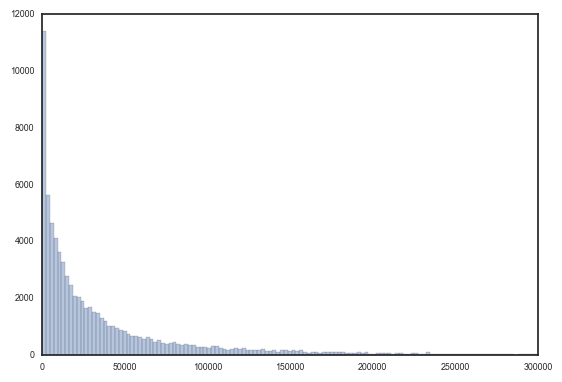

In [25]:
import seaborn as sns
%matplotlib inline
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})

g1 = sns.distplot(genes_reduced_df[['size']], kde=False, bins=1000)
g1.set_xlim(0, 300000)

In [29]:
genes_reduced_df[['size']].max()

size    2320934
dtype: int64